In [1]:
import requests
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://gql.tokopedia.com/graphql/SearchProductQueryV4'

In [3]:
payload = [{
    'operationName': "SearchProductQueryV4",
    'variables': {
        "params": "device=desktop&navsource=&ob=23&page={}&q={}&related=true&rows=60&safe_search=false&scheme=https&shipping=&source=search&srp_component_id=02.01.00.00&srp_page_id=&srp_page_title=&st=product&start={}&topads_bucket=true&unique_id=330142c9d1c168eaabef95522c06e1fa&user_addressId=44389028&user_cityId=167&user_districtId=2202&user_id=24265242&user_lat=-6.218126229670426&user_long=107.01841201633215&user_postCode=17123&user_warehouseId=12941747&variants=&warehouses=12941747%232h%2C0%2315m"
        },
    'query': "query SearchProductQueryV4($params: String!) {\n  ace_search_product_v4(params: $params) {\n    header {\n      totalData\n      totalDataText\n      processTime\n      responseCode\n      errorMessage\n      additionalParams\n      keywordProcess\n      componentId\n      __typename\n    }\n    data {\n      banner {\n        position\n        text\n        imageUrl\n        url\n        componentId\n        trackingOption\n        __typename\n      }\n      backendFilters\n      isQuerySafe\n      ticker {\n        text\n        query\n        typeId\n        componentId\n        trackingOption\n        __typename\n      }\n      redirection {\n        redirectUrl\n        departmentId\n        __typename\n      }\n      related {\n        position\n        trackingOption\n        relatedKeyword\n        otherRelated {\n          keyword\n          url\n          product {\n            id\n            name\n            price\n            imageUrl\n            rating\n            countReview\n            url\n            priceStr\n            wishlist\n            shop {\n              city\n              isOfficial\n              isPowerBadge\n              __typename\n            }\n            ads {\n              adsId: id\n              productClickUrl\n              productWishlistUrl\n              shopClickUrl\n              productViewUrl\n              __typename\n            }\n            badges {\n              title\n              imageUrl\n              show\n              __typename\n            }\n            ratingAverage\n            labelGroups {\n              position\n              type\n              title\n              url\n              __typename\n            }\n            componentId\n            __typename\n          }\n          componentId\n          __typename\n        }\n        __typename\n      }\n      suggestion {\n        currentKeyword\n        suggestion\n        suggestionCount\n        instead\n        insteadCount\n        query\n        text\n        componentId\n        trackingOption\n        __typename\n      }\n      products {\n        id\n        name\n        ads {\n          adsId: id\n          productClickUrl\n          productWishlistUrl\n          productViewUrl\n          __typename\n        }\n        badges {\n          title\n          imageUrl\n          show\n          __typename\n        }\n        category: departmentId\n        categoryBreadcrumb\n        categoryId\n        categoryName\n        countReview\n        customVideoURL\n        discountPercentage\n        gaKey\n        imageUrl\n        labelGroups {\n          position\n          title\n          type\n          url\n          __typename\n        }\n        originalPrice\n        price\n        priceRange\n        rating\n        ratingAverage\n        shop {\n          shopId: id\n          name\n          url\n          city\n          isOfficial\n          isPowerBadge\n          __typename\n        }\n        url\n        wishlist\n        sourceEngine: source_engine\n        __typename\n      }\n      violation {\n        headerText\n        descriptionText\n        imageURL\n        ctaURL\n        ctaApplink\n        buttonText\n        buttonType\n        __typename\n      }\n      __typename\n    }\n    __typename\n  }\n}\n"
}]

In [5]:
req = requests.post(url, json=payload).json()
rows = req[0]['data']['ace_search_product_v4']['data']['products']
print(len(rows))

60


In [6]:
print(req)

[{'data': {'ace_search_product_v4': {'header': {'totalData': 13943939, 'totalDataText': '13.7jt+', 'processTime': 0.382287838, 'responseCode': 6, 'errorMessage': '', 'additionalParams': 'rf=true&nuq=ac', 'keywordProcess': '7', 'componentId': '02.01.00.00', '__typename': 'AceSearchUnifyHeader'}, 'data': {'banner': {'position': 0, 'text': '', 'imageUrl': '', 'url': '', 'componentId': '', 'trackingOption': 0, '__typename': 'AceSearchUnifyBanner'}, 'backendFilters': '&ob=104', 'isQuerySafe': True, 'ticker': {'text': '', 'query': '', 'typeId': 0, 'componentId': '', 'trackingOption': 0, '__typename': 'AceSearchUnifyTicker'}, 'redirection': {'redirectUrl': '', 'departmentId': 0, '__typename': 'AceSearchUnifyRedirection'}, 'related': {'position': 0, 'trackingOption': 0, 'relatedKeyword': 'ac', 'otherRelated': [], '__typename': 'AceSearchUnifyRelated'}, 'suggestion': {'currentKeyword': '{}', 'suggestion': 'ac', 'suggestionCount': 13948437, 'instead': '', 'insteadCount': 0, 'query': '', 'text': 

In [7]:
for i in range(0, len(rows)):
    no = i
    nama_produk = rows[i]['name']
    harga = rows[i]['price']
    rating = rows[i]['ratingAverage']
    toko = rows[i]['shop']['name']
    lokasi = rows[i]['shop']['city']
    tjl = rows[i]['labelGroups']
    terjual = ''
    for i in tjl:
        if tjl[0]['position'] == 'costperunit':
            terjual = ''
        elif tjl[0]['title'] == 'PreOrder':
            terjual = ''
        elif tjl[0]['title'] == 'Grosir':
            terjual = ''
        elif tjl[0]['title'] == 'Produk Terbaru':
            terjual = ''
        elif tjl[0]['title'] =='Cashback':
            terjual = ''
        else:
            terjual = tjl[0]['title']
    #terjual = next((rows[i]['labelGroups'][0]['title'] for item in rows[i]['labelGroups'][0] if rows[i]['labelGroups'][0]['position'] == 'integrity'), None)
    print(no, nama_produk, harga, rating, toko, lokasi, terjual)

0 LG AC STANDART H05TN4 H05-TN4 [1/2 PK] GARANSI RESMI Rp2.549.900 4.9 sinar agung electronic Kab. Bekasi 
1 AC SAMSUNG 1/2 PK STANDARD AR05TGHQASINSE Rp2.899.000 4.9 Courts Elektronik Bekasi 
2 AC AQUA AQA- 5AHR1 1/2 PK Harga Unit Only Rp2.149.000 4.8 COOLING CENTER Jakarta Timur Terlaris
3 AC DAIKIN FTP 25 AV14 RV 1 PK + PASANG R32 STANDARD MALAYSIA LOW WATT Rp3.850.000 4.8 MJ GROSIR ELEKTRONIK Bekasi 
4 AC DAIKIN FTP 15 AV14 0.5 PK 1/2PK + PASANG R32 STANDARD MALAYSIA LOW Rp3.550.000 4.9 MJ GROSIR ELEKTRONIK Bekasi Terlaris
5 modul Ac universal Rp95.000 5.0 karya teknik ac Bekasi 
6 AC AQUA JAPAN AQA KR 05 AHP KR05AHP 1/2 PK + PASANG R32 LOW WATT Rp2.998.000 5.0 MJ GROSIR ELEKTRONIK Bekasi 
7 termis/thermistor ac daikin tipe FTC /FTKQ ori daikin Rp99.999 4.9 karya teknik ac Bekasi Terjual 70+
8 Plastik Cuci AC Besar 1/2 - 2 PK Rp32.000 4.9 Pacific Plastik Inti - JKT Jakarta Barat Terlaris
9 Outdoor AC Sharp UK 1/2 Pk tipe 05 UCY Rp1.400.000 4.9 karya teknik ac Bekasi Sisa 2
10 PLAST

In [8]:
len(terjual)

0

In [9]:
search = 'Trisodium Phosphate'
url = 'https://gql.tokopedia.com/graphql/SearchProductQueryV4'

def get_param():
    params = []
    for i in range(1,27):
        param = "device=desktop&navsource=&ob=23&page={}&q={}&related=true&rows=60&safe_search=false&scheme=https&shipping=&source=search&srp_component_id=02.01.00.00&srp_page_id=&srp_page_title=&st=product&start={}&topads_bucket=true&unique_id=330142c9d1c168eaabef95522c06e1fa&user_addressId=44389028&user_cityId=167&user_districtId=2202&user_id=24265242&user_lat=-6.218126229670426&user_long=107.01841201633215&user_postCode=17123&user_warehouseId=12941747&variants=&warehouses=12941747%232h%2C0%2315m".format(i, search, (i-1)*60)
        params.append(param)

    return params

def scraped(param):
    payload = [{
    'operationName': "SearchProductQueryV4",
    'variables': {
        "params": param
        },
    'query': "query SearchProductQueryV4($params: String!) {\n  ace_search_product_v4(params: $params) {\n    header {\n      totalData\n      totalDataText\n      processTime\n      responseCode\n      errorMessage\n      additionalParams\n      keywordProcess\n      componentId\n      __typename\n    }\n    data {\n      banner {\n        position\n        text\n        imageUrl\n        url\n        componentId\n        trackingOption\n        __typename\n      }\n      backendFilters\n      isQuerySafe\n      ticker {\n        text\n        query\n        typeId\n        componentId\n        trackingOption\n        __typename\n      }\n      redirection {\n        redirectUrl\n        departmentId\n        __typename\n      }\n      related {\n        position\n        trackingOption\n        relatedKeyword\n        otherRelated {\n          keyword\n          url\n          product {\n            id\n            name\n            price\n            imageUrl\n            rating\n            countReview\n            url\n            priceStr\n            wishlist\n            shop {\n              city\n              isOfficial\n              isPowerBadge\n              __typename\n            }\n            ads {\n              adsId: id\n              productClickUrl\n              productWishlistUrl\n              shopClickUrl\n              productViewUrl\n              __typename\n            }\n            badges {\n              title\n              imageUrl\n              show\n              __typename\n            }\n            ratingAverage\n            labelGroups {\n              position\n              type\n              title\n              url\n              __typename\n            }\n            componentId\n            __typename\n          }\n          componentId\n          __typename\n        }\n        __typename\n      }\n      suggestion {\n        currentKeyword\n        suggestion\n        suggestionCount\n        instead\n        insteadCount\n        query\n        text\n        componentId\n        trackingOption\n        __typename\n      }\n      products {\n        id\n        name\n        ads {\n          adsId: id\n          productClickUrl\n          productWishlistUrl\n          productViewUrl\n          __typename\n        }\n        badges {\n          title\n          imageUrl\n          show\n          __typename\n        }\n        category: departmentId\n        categoryBreadcrumb\n        categoryId\n        categoryName\n        countReview\n        customVideoURL\n        discountPercentage\n        gaKey\n        imageUrl\n        labelGroups {\n          position\n          title\n          type\n          url\n          __typename\n        }\n        originalPrice\n        price\n        priceRange\n        rating\n        ratingAverage\n        shop {\n          shopId: id\n          name\n          url\n          city\n          isOfficial\n          isPowerBadge\n          __typename\n        }\n        url\n        wishlist\n        sourceEngine: source_engine\n        __typename\n      }\n      violation {\n        headerText\n        descriptionText\n        imageURL\n        ctaURL\n        ctaApplink\n        buttonText\n        buttonType\n        __typename\n      }\n      __typename\n    }\n    __typename\n  }\n}\n"
    }]

    req = requests.post(url, json=payload).json()
    rows = req[0]['data']['ace_search_product_v4']['data']['products']
    #print(len(rows))
    scraped = []
    for i in range(0, len(rows)):
        no = i
        toko = rows[i]['shop']['name']
        lokasi = rows[i]['shop']['city']
        nama_produk = rows[i]['name']
        harga = rows[i]['price']
        rating = rows[i]['ratingAverage']
        tjl = rows[i]['labelGroups']
        terjual = ''
        for i in tjl:
            if tjl[0]['position'] == 'costperunit':
                terjual = ''
            elif tjl[0]['title'] == 'PreOrder':
                terjual = ''
            elif tjl[0]['title'] == 'Grosir':
                terjual = ''
            elif tjl[0]['title'] == 'Produk Terbaru':
                terjual = ''
            elif tjl[0]['title'] =='Cashback':
                terjual = ''
            else:
                terjual = tjl[0]['title']
        scraped.append((
            nama_produk, harga, rating, toko, lokasi, terjual
        ))
    return scraped

if __name__ == '__main__':
    params = get_param()
    all_data = []
    for i in range(0, len(params)):
        param = params[i]
        data = scraped(param)
        all_data.extend(data)
    #print(all_data)
    df_Trisodium_Phosphate = pd.DataFrame(all_data, columns=['Nama Produk', 'Harga', 'Rating', 'Toko', 'Lokasi', 'Terjual'])

In [ ]:
#params_all = "device=desktop&navsource=&ob=23&page={}&q={}&related=true&rows=60&safe_search=false&scheme=https&shipping=&source=search&srp_component_id=02.01.00.00&srp_page_id=&srp_page_title=&st=product&start={}&topads_bucket=true&unique_id=330142c9d1c168eaabef95522c06e1fa&user_addressId=44389028&user_cityId=167&user_districtId=2202&user_id=24265242&user_lat=-6.218126229670426&user_long=107.01841201633215&user_postCode=17123&user_warehouseId=12941747&variants=&warehouses=12941747%232h%2C0%2315m".format(page, start)

In [10]:
df_Trisodium_Phosphate

,Nama Produk,Harga,Rating,Toko,Lokasi,Terjual
0,TSP / Trisodium Phosphate / Phospate / Fosfat 1KG,Rp13.000,4.7,NIO Chemical,Kab. Tangerang,Terjual 750+
1,Trisodium Phosphate - TSP - phosphate - pospha...,Rp10.000,5.0,Kalang Kabut Kimia,Jakarta Selatan,Terjual 22
2,tsp trisodium phosphate - phospate kemasan 1 kg,Rp10.500,5.0,Chemposite store,Surabaya,
3,TSP - Trisodium Phosphate 1 Kg,Rp18.000,4.9,Multi Kimia,Jakarta Pusat,Terjual 70+
4,Trisodium Phosphate / TSP - 25KG,Rp225.000,5.0,Daun Ubi,Tangerang,Terjual 3
...,...,...,...,...,...,...
290,✔ TSP / Trisodium Phosphate / Phospate / Fosfa...,Rp77.000,,ARUMMI OFFICIAL STORE,Denpasar,
291,Trisodium Phosphate / TSP 25Kg,Rp325.000,,Bixxon,Bandung,
292,Tri sodium phosphate dodecahydrate MERCK 10657...,Rp3.743.000,,Una Shop77,Jakarta Selatan,
293,SALE GERCEP! TRI SODIUM PHOSPHATE DODECAHYDRAT...,Rp4.004.000,,gunos98_12,Jakarta Pusat,


In [11]:
df_Trisodium_Phosphate['Terjual'].unique()

array(['Terjual 750+', 'Terjual 22', '', 'Terjual 70+', 'Terjual 3',
       'Terjual 9', 'Diskon', 'Terjual 10', 'Terjual 100+', 'Terjual 5',
       'Terjual 50+', 'Terjual 1', 'Terjual 28', 'Terjual 19',
       'Terjual 8', 'Terjual 29', 'Terjual 2', 'Terjual 17', 'Terjual 20'],
      dtype=object)

In [12]:
df_Trisodium_Phosphate.loc[df_Trisodium_Phosphate['Terjual'] == 'Terjual 1', 'Terjual_num1'] = '1'
df_Trisodium_Phosphate.loc[df_Trisodium_Phosphate['Terjual'] == 'Terjual 2', 'Terjual_num1'] = '2'
df_Trisodium_Phosphate.loc[df_Trisodium_Phosphate['Terjual'] == 'Terjual 3', 'Terjual_num1'] = '3'
df_Trisodium_Phosphate.loc[df_Trisodium_Phosphate['Terjual'] == 'Terjual 4', 'Terjual_num1'] = '4'
df_Trisodium_Phosphate.loc[df_Trisodium_Phosphate['Terjual'] == 'Terjual 5', 'Terjual_num1'] = '5'
df_Trisodium_Phosphate.loc[df_Trisodium_Phosphate['Terjual'] == 'Terjual 6', 'Terjual_num1'] = '6'
df_Trisodium_Phosphate.loc[df_Trisodium_Phosphate['Terjual'] == 'Terjual 7', 'Terjual_num1'] = '7'
df_Trisodium_Phosphate.loc[df_Trisodium_Phosphate['Terjual'] == 'Terjual 8', 'Terjual_num1'] = '8'
df_Trisodium_Phosphate.loc[df_Trisodium_Phosphate['Terjual'] == 'Terjual 9', 'Terjual_num1'] = '9'
df_Trisodium_Phosphate.loc[df_Trisodium_Phosphate['Terjual'] == 'Terjual 10', 'Terjual_num1'] = '10'
df_Trisodium_Phosphate.loc[df_Trisodium_Phosphate['Terjual'] == 'Terjual 11', 'Terjual_num1'] = '11'
df_Trisodium_Phosphate.loc[df_Trisodium_Phosphate['Terjual'] == 'Terjual 12', 'Terjual_num1'] = '12'
df_Trisodium_Phosphate.loc[df_Trisodium_Phosphate['Terjual'] == 'Terjual 13', 'Terjual_num1'] = '13'
df_Trisodium_Phosphate.loc[df_Trisodium_Phosphate['Terjual'] == 'Terjual 15', 'Terjual_num1'] = '15'
df_Trisodium_Phosphate.loc[df_Trisodium_Phosphate['Terjual'] == 'Terjual 16', 'Terjual_num1'] = '16'
df_Trisodium_Phosphate.loc[df_Trisodium_Phosphate['Terjual'] == 'Terjual 18', 'Terjual_num1'] = '18'
df_Trisodium_Phosphate.loc[df_Trisodium_Phosphate['Terjual'] == 'Terjual 19', 'Terjual_num1'] = '19'
df_Trisodium_Phosphate.loc[df_Trisodium_Phosphate['Terjual'] == 'Terjual 20', 'Terjual_num1'] = '20'
df_Trisodium_Phosphate.loc[df_Trisodium_Phosphate['Terjual'] == 'Terjual 21', 'Terjual_num1'] = '21'
df_Trisodium_Phosphate.loc[df_Trisodium_Phosphate['Terjual'] == 'Terjual 22', 'Terjual_num1'] = '22'
df_Trisodium_Phosphate.loc[df_Trisodium_Phosphate['Terjual'] == 'Terjual 24', 'Terjual_num1'] = '24'
df_Trisodium_Phosphate.loc[df_Trisodium_Phosphate['Terjual'] == 'Terjual 25', 'Terjual_num1'] = '25'
df_Trisodium_Phosphate.loc[df_Trisodium_Phosphate['Terjual'] == 'Terjual 28', 'Terjual_num1'] = '28'
df_Trisodium_Phosphate.loc[df_Trisodium_Phosphate['Terjual'] == 'Terjual 30+', 'Terjual_num1'] = '30'
df_Trisodium_Phosphate.loc[df_Trisodium_Phosphate['Terjual'] == 'Terjual 50+', 'Terjual_num1'] = '50'
df_Trisodium_Phosphate.loc[df_Trisodium_Phosphate['Terjual'] == 'Terjual 60+', 'Terjual_num1'] = '60'
df_Trisodium_Phosphate.loc[df_Trisodium_Phosphate['Terjual'] == 'Terjual 80+', 'Terjual_num1'] = '80'
df_Trisodium_Phosphate.loc[df_Trisodium_Phosphate['Terjual'] == 'Terjual 250+', 'Terjual_num1'] = '250'
df_Trisodium_Phosphate.loc[df_Trisodium_Phosphate['Terjual'] == 'Terjual 500+', 'Terjual_num1'] = '500'
df_Trisodium_Phosphate.loc[df_Trisodium_Phosphate['Terjual'] == 'Terjual 750+', 'Terjual_num1'] = '750'
df_Trisodium_Phosphate.loc[df_Trisodium_Phosphate['Terjual'] == 'Terjual 1 rb+', 'Terjual_num1'] = '1000'
df_Trisodium_Phosphate.loc[df_Trisodium_Phosphate['Terjual'] == 'Terjual 3 rb+', 'Terjual_num1'] = '3000'
df_Trisodium_Phosphate.loc[df_Trisodium_Phosphate['Terjual'] == 'Terjual 4 rb+', 'Terjual_num1'] = '4000'

In [13]:
df_Trisodium_Phosphate['Terjual_num1'] = df_Trisodium_Phosphate['Terjual_num1'].astype(float)

In [14]:
df_Trisodium_Phosphate['Rating'] = df_Trisodium_Phosphate['Rating'].replace('', np.nan, regex=True)
df_Trisodium_Phosphate['Rating'] = df_Trisodium_Phosphate['Rating'].astype(float)

In [15]:
df_Trisodium_Phosphate['Harga'] = df_Trisodium_Phosphate['Harga'].str.replace(r'\D', '')

C:\Users\i_fes\AppData\Local\Temp\ipykernel_8972\1538342611.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_Trisodium_Phosphate['Harga'] = df_Trisodium_Phosphate['Harga'].str.replace(r'\D', '')


In [16]:
df_Trisodium_Phosphate['Harga'] = df_Trisodium_Phosphate['Harga'].astype(float)

In [17]:
df_Trisodium_Phosphate.dtypes

Nama Produk      object
Harga           float64
Rating          float64
Toko             object
Lokasi           object
Terjual          object
Terjual_num1    float64
dtype: object

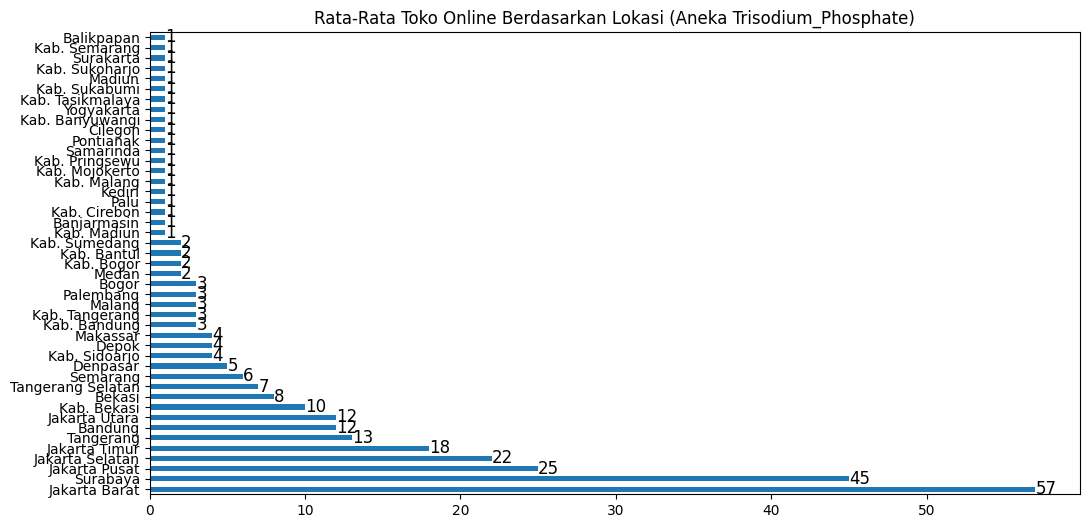

In [18]:
ax = df_Trisodium_Phosphate['Lokasi'].value_counts() \
    .plot(kind= 'barh', figsize = (12,6), title='Rata-Rata Toko Online Berdasarkan Lokasi (Aneka Trisodium_Phosphate)')

plt.ticklabel_format(style='plain', axis='x')

ax.bar_label(ax.containers[0], label_type = 'edge', fmt = '%d', fontsize = 12)

plt.show()

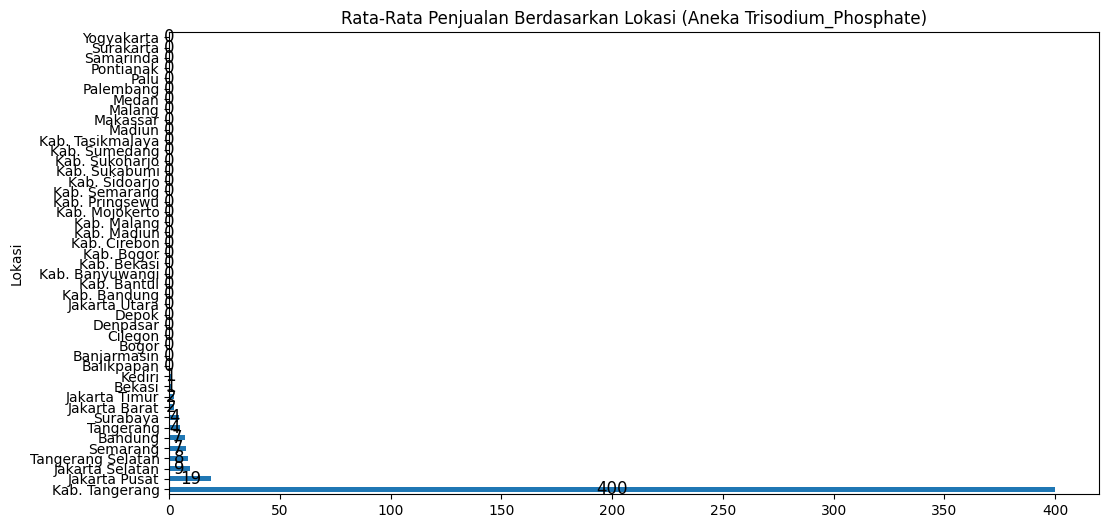

In [19]:
ax = df_Trisodium_Phosphate.groupby('Lokasi')['Terjual_num1'].mean().sort_values(ascending=False) \
    .plot(kind= 'barh', figsize = (12,6), title='Rata-Rata Penjualan Berdasarkan Lokasi (Aneka Trisodium_Phosphate)')
ax.bar_label(ax.containers[0], label_type = 'center', fmt = '%d', fontsize=12)
plt.show()

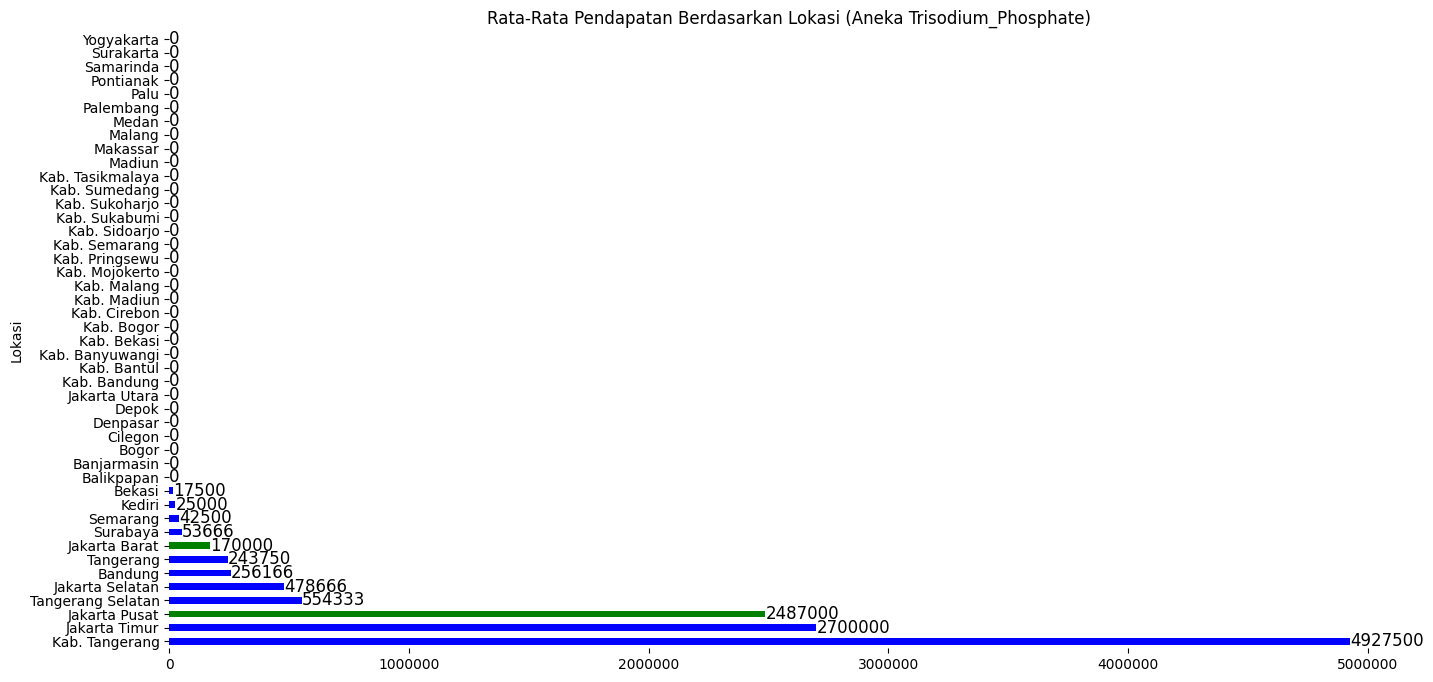

In [20]:
df_Trisodium_Phosphate['Pendapatan'] = df_Trisodium_Phosphate['Terjual_num1']*df_Trisodium_Phosphate['Harga']
my_colors = list('bbgbb')

ax = df_Trisodium_Phosphate.groupby('Lokasi')['Pendapatan'].mean().sort_values(ascending=False) \
    .plot(kind= 'barh', figsize = (16,8), title='Rata-Rata Pendapatan Berdasarkan Lokasi (Aneka Trisodium_Phosphate)', color=my_colors)
plt.ticklabel_format(style='plain', axis='x')

ax.bar_label(ax.containers[0], label_type = 'edge', fmt = '%d', fontsize=12)
for spine in ax.spines:
    ax.spines[spine].set_visible(False)

#rects = ax.patches

#labels = [f"label{i}" for i in range(len(rects))]


#for rect, label in zip(rects, labels):
#    height = rect.get_height()
#    ax.text(
#        rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom"
#    )

plt.show()

C:\Users\i_fes\AppData\Local\Temp\ipykernel_8972\384398612.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df_Trisodium_Phosphate.dropna().corr()


<Axes: >

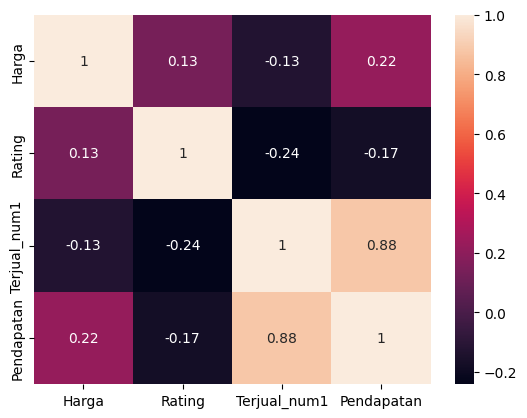

In [21]:
df_corr = df_Trisodium_Phosphate.dropna().corr()
sns.heatmap(df_corr, annot = True)

In [ ]:
#df_Trisodium_Phosphate.to_excel('Tokped_Daging_API.xlsx', index=False)